In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.01
epochs = 5

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Test with a few examples (Optional)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        print(f'Predicted: {predicted.item()}, Actual: {labels.item()}')
        break  # Only test one example


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17227100.16it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 464603.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3688184.29it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3581599.69it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.6913
Epoch [2/5], Loss: 0.3479
Epoch [3/5], Loss: 0.4093
Epoch [4/5], Loss: 0.1865
Epoch [5/5], Loss: 0.3715
Predicted: 2, Actual: 2


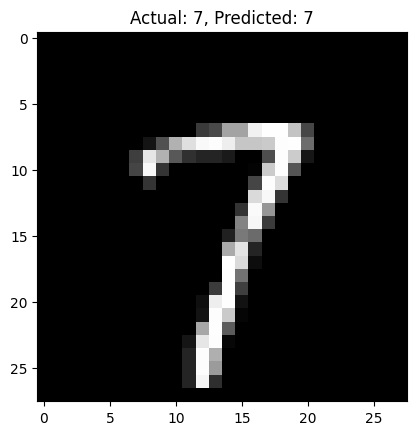

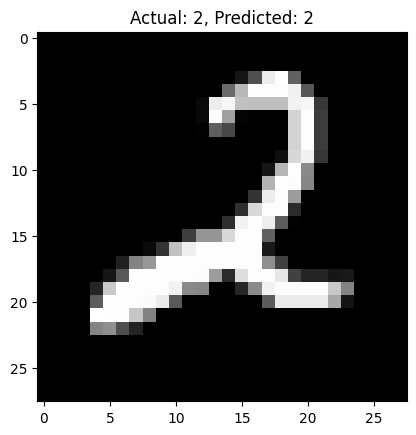

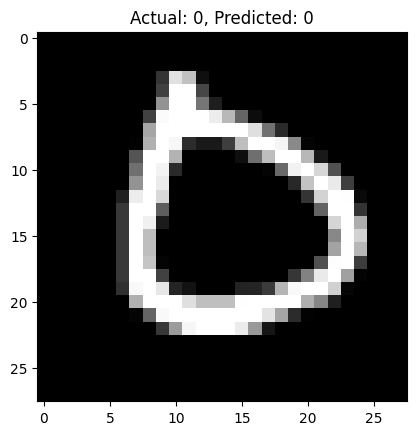

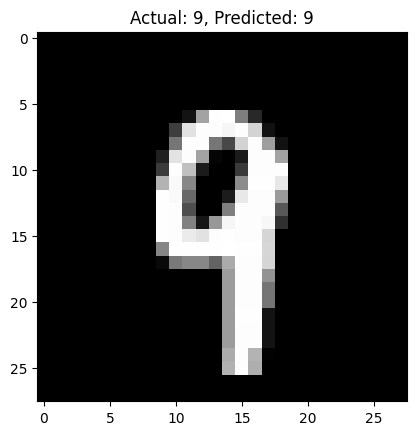

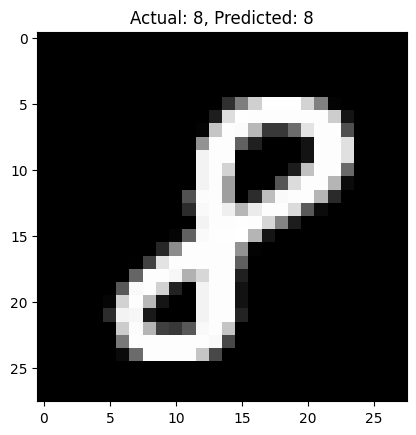

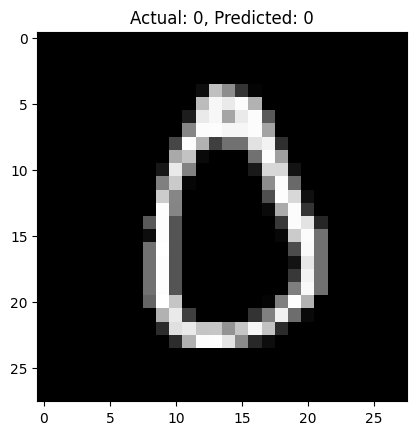

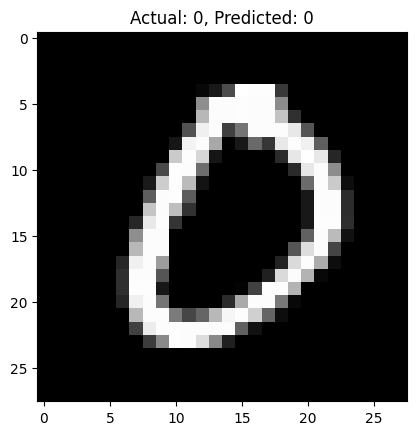

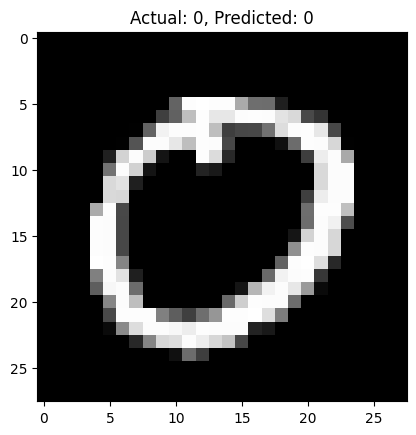

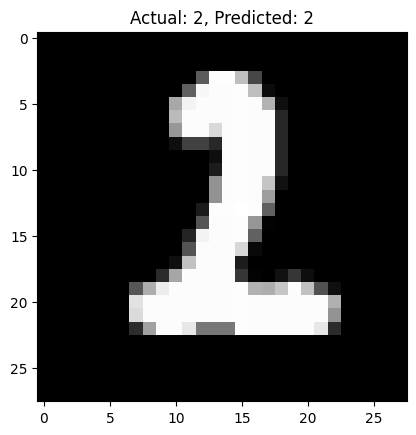

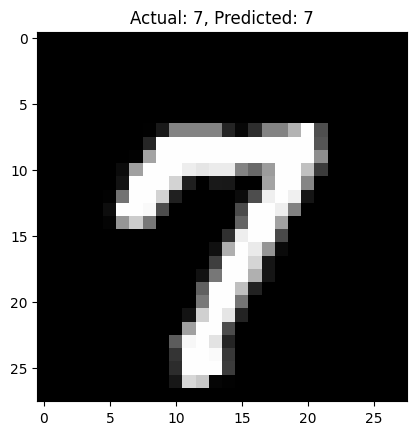

In [ ]:
import matplotlib.pyplot as plt

# Function to display image and prediction
def show_image(img, label, prediction):
    img = img.squeeze()  # Remove channel dimension
    plt.imshow(img, cmap='gray')
    plt.title(f'Actual: {label}, Predicted: {prediction}')
    plt.show()

# Test and display predictions for multiple images
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Display the image and predictions
        show_image(images[0], labels.item(), predicted.item())

        if i == 9:  # Display 10 images
            break